In [5]:
# UTS Pengolahan Citra Digital
# Parikesit Bhanayaka Putra – Sistem Informasi

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage import io, img_as_float, filters

def show(img, title="", cmap='gray'):
    plt.figure(figsize=(5,5))
    plt.title(title)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

def mse(img1, img2):
    return np.mean((img1 - img2)**2)

def psnr(img1, img2):
    return 20 * np.log10(1.0 / np.sqrt(mse(img1, img2)))

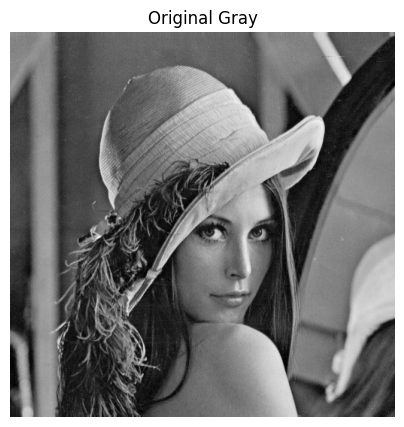

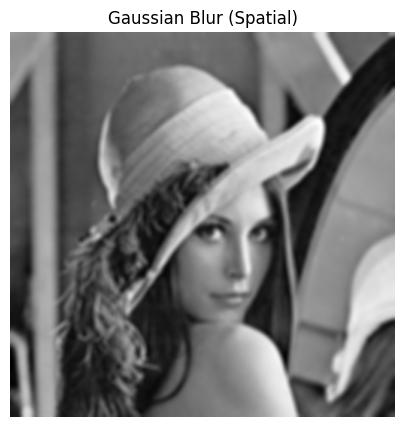

In [6]:
# Load Lenna
url = "https://raw.githubusercontent.com/lenna-project/ultraface-plugin/main/assets/lenna.png"
img = img_as_float(io.imread(url))
gray = cv2.cvtColor((img*255).astype(np.uint8), cv2.COLOR_BGR2GRAY)/255

show(gray, "Original Gray")

# Gaussian Blur (Domain Spasial)
spatial_blur = cv2.GaussianBlur(gray, (9,9), 3)
show(spatial_blur, "Gaussian Blur (Spatial)")


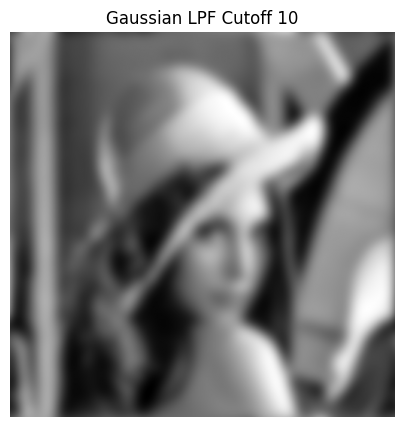

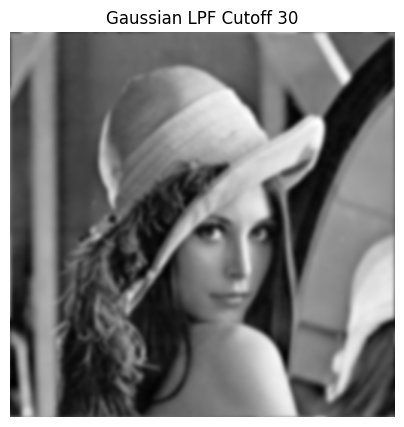

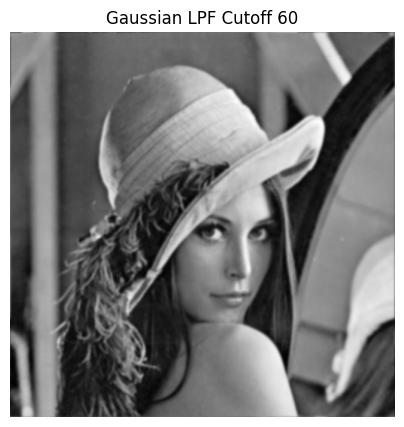

In [7]:
def gaussian_lpf(img, cutoff):
    f = np.fft.fftshift(np.fft.fft2(img))
    M, N = img.shape
    u, v = np.meshgrid(np.arange(M), np.arange(N))
    D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
    H = np.exp(-(D**2) / (2*(cutoff**2)))
    G = f * H
    return np.abs(np.fft.ifft2(np.fft.ifftshift(G))), H

freq10, _ = gaussian_lpf(gray, 10)
freq30, _ = gaussian_lpf(gray, 30)
freq60, _ = gaussian_lpf(gray, 60)

show(freq10, "Gaussian LPF Cutoff 10")
show(freq30, "Gaussian LPF Cutoff 30")
show(freq60, "Gaussian LPF Cutoff 60")

In [10]:
print("== Spatial Blur ==")
print("MSE:", mse(gray, spatial_blur))
print("PSNR:", psnr(gray, spatial_blur))
print("SSIM:", ssim(gray, spatial_blur, data_range=1.0))

print("\n== LPF cutoff 30 ==")
print("MSE:", mse(gray, freq30))
print("PSNR:", psnr(gray, freq30))
print("SSIM:", ssim(gray, freq30, data_range=1.0))


== Spatial Blur ==
MSE: 0.0019367016921968284
PSNR: 27.12937267979801
SSIM: 0.7609614839243911

== LPF cutoff 30 ==
MSE: 0.0023316243407287265
PSNR: 26.32341419560779
SSIM: 0.7399336121453315


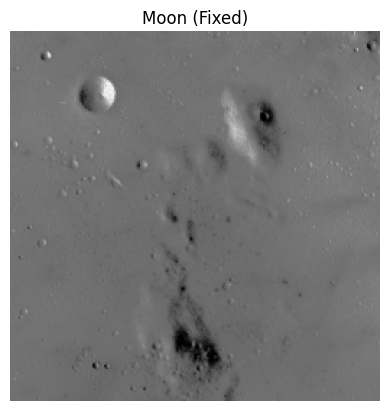

In [13]:
import matplotlib.pyplot as plt
from skimage import data, img_as_float
# Perhatikan: io.imread hanya digunakan jika Anda memuat dari file lokal atau URL eksternal
# Untuk data bawaan (built-in) dari scikit-image, gunakan fungsi data.<nama_data>()

# 1. Muat data moon menggunakan fungsi bawaan scikit-image
moon = data.moon()

# 2. Konversi ke float, meskipun data moon() sudah dalam tipe float
# Anda bisa menggunakan moon = img_as_float(moon) jika diperlukan, tapi moon() sudah float64
moon_float = img_as_float(moon)

# 3. Definisikan fungsi show (jika belum didefinisikan) atau gunakan plt.imshow
def show(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 4. Tampilkan gambar
show(moon_float, "Moon (Fixed)")

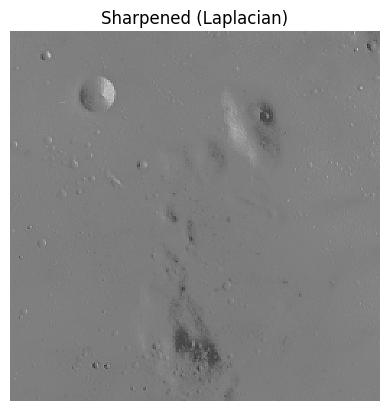

In [14]:
laplacian = cv2.Laplacian(moon, cv2.CV_64F)
sharp_spatial = moon - laplacian

show(sharp_spatial, "Sharpened (Laplacian)")

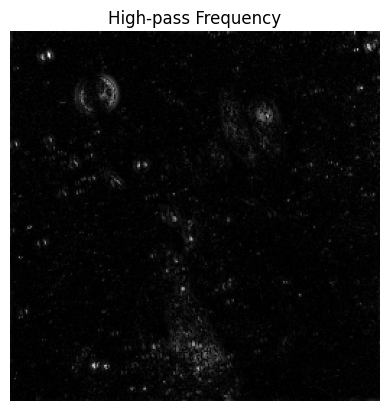

In [15]:
def gaussian_hpf(img, cutoff):
    f = np.fft.fftshift(np.fft.fft2(img))
    M, N = img.shape
    u,v = np.meshgrid(np.arange(M), np.arange(N))
    D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
    H = 1 - np.exp(-(D**2) / (2*(cutoff**2)))
    G = f * H
    return np.abs(np.fft.ifft2(np.fft.ifftshift(G)))

freq_hpf = gaussian_hpf(moon, 20)
show(freq_hpf, "High-pass Frequency")

In [17]:
import numpy as np
from skimage import metrics
# Asumsi: Anda sudah memuat gambar moon, sharp_spatial, dan freq_hpf
# dan semuanya bertipe float (rentang 0.0 hingga 1.0)

# Pastikan Anda mengimpor psnr dan ssim dari metrics
psnr = metrics.peak_signal_noise_ratio
ssim = metrics.structural_similarity

# --- Baris Kode yang Diperbaiki ---

# Perbaikan 1: Tambahkan data_range=1.0 ke ssim Laplasian
print("PSNR Laplasian:", psnr(moon, sharp_spatial))
print("SSIM Laplasian:", ssim(moon, sharp_spatial, data_range=1.0))

# Perbaikan 2: Tambahkan data_range=1.0 ke ssim HPF
print("PSNR HPF:", psnr(moon, freq_hpf))
print("SSIM HPF:", ssim(moon, freq_hpf, data_range=1.0))

# --- Akhir Baris Kode yang Diperbaiki ---

PSNR Laplasian: 30.0161446559531
SSIM Laplasian: 0.5349945244660924
PSNR HPF: 7.238129936523711
SSIM HPF: -0.0037465783944717747


/tmp/ipython-input-1149000098.py:13: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("PSNR Laplasian:", psnr(moon, sharp_spatial))
/tmp/ipython-input-1149000098.py:17: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("PSNR HPF:", psnr(moon, freq_hpf))


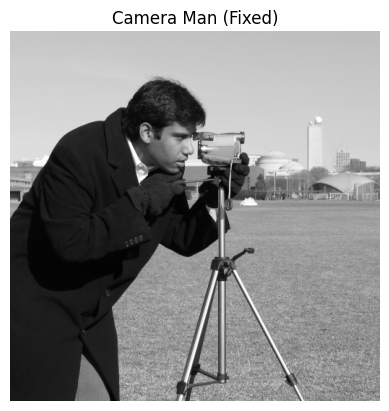

In [19]:
import matplotlib.pyplot as plt
from skimage import data, img_as_float

# 1. Muat data "Camera Man" menggunakan fungsi bawaan scikit-image
# Ini menggantikan baris: url_cam = "..." dan cam = img_as_float(io.imread(url_cam))
cam = data.camera()

# 2. Pastikan gambar diubah ke float (jika data.camera() belum float)
# Perlu dicatat: data.camera() mengembalikan uint8, jadi konversi ke float diperlukan untuk beberapa operasi selanjutnya.
cam_float = img_as_float(cam)

# 3. Definisikan atau gunakan fungsi show untuk menampilkan
def show(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 4. Tampilkan gambar
show(cam_float, "Camera Man (Fixed)")

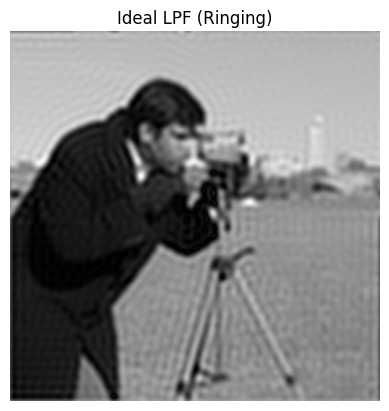

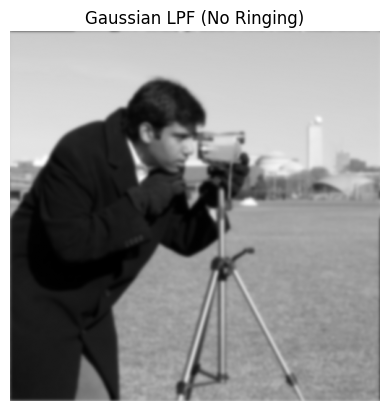

In [20]:
def ideal_lpf(img, cutoff):
    f = np.fft.fftshift(np.fft.fft2(img))
    M, N = img.shape
    u,v = np.meshgrid(np.arange(M), np.arange(N))
    D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
    H = (D < cutoff).astype(np.float32)
    G = f * H
    return np.abs(np.fft.ifft2(np.fft.ifftshift(G)))

ideal = ideal_lpf(cam, 40)
gauss = gaussian_lpf(cam, 40)[0]

show(ideal, "Ideal LPF (Ringing)")
show(gauss, "Gaussian LPF (No Ringing)")

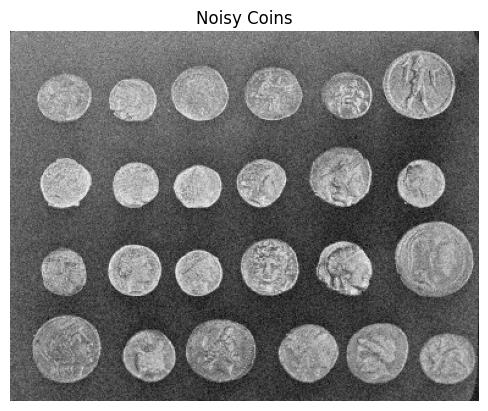

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float

# 1. Definisikan fungsi show (jika belum ada)
def show(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# --- Kode yang Diperbaiki ---

# Ganti pemuatan URL yang gagal dengan fungsi bawaan scikit-image
coins = data.coins() # data.coins() mengembalikan gambar uint8 (0-255)

# Konversi ke float, seperti yang dimaksudkan oleh kode asli
coins_float = img_as_float(coins)

# Tambahkan noise (Gunakan coins_float sebagai base)
# Catatan: Noise harus disesuaikan untuk rentang float (0.0 hingga 1.0).
# Jika 15/255 adalah faktor konversi dari uint8, maka ini sudah benar untuk float.
# 15/255 kira-kira 0.0588
noise = coins_float + np.random.normal(0, 15/255, coins_float.shape)
show(noise, "Noisy Coins")

# --- Akhir Kode yang Diperbaiki ---

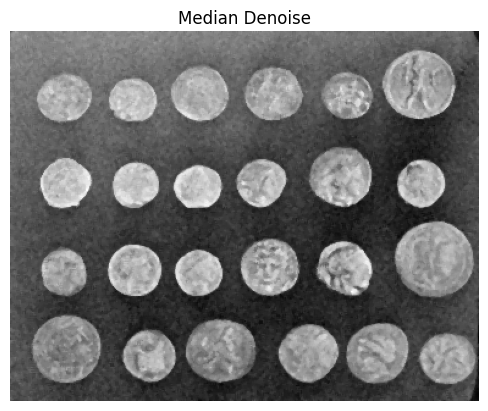

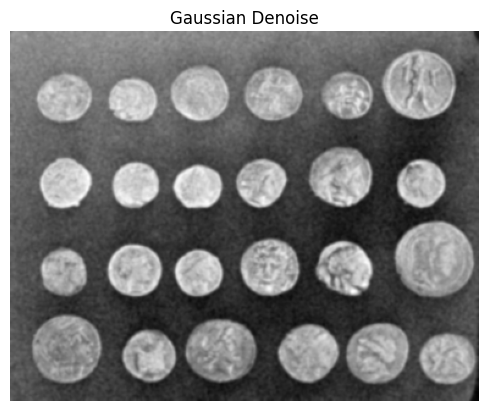

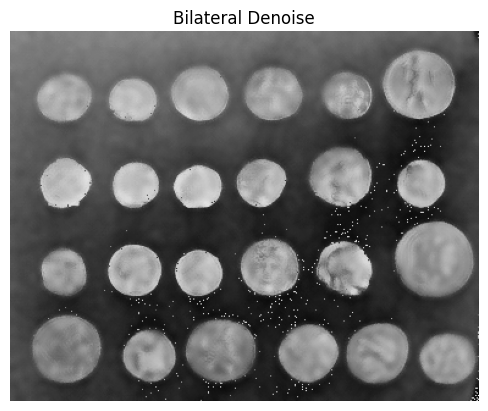

In [23]:
median = filters.median(noise)
gaussian = cv2.GaussianBlur(noise, (7,7), 1)
bilateral = cv2.bilateralFilter((noise*255).astype(np.uint8), 9, 75, 75)/255

show(median, "Median Denoise")
show(gaussian, "Gaussian Denoise")
show(bilateral, "Bilateral Denoise")

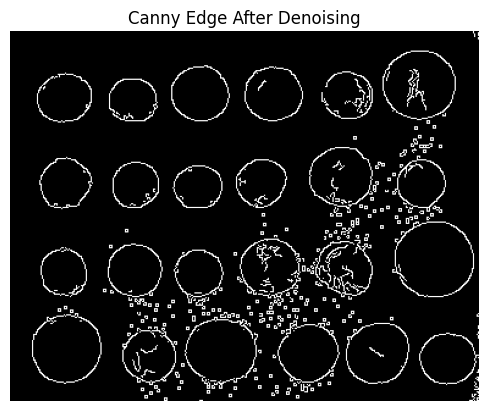

In [24]:
edges = cv2.Canny((bilateral*255).astype(np.uint8), 80, 150)
show(edges, "Canny Edge After Denoising")